## Program to create an averaged Themis Thermal Inertia Map

[Source - cub files from the website]('https://astrogeology.usgs.gov/maps/mars-themis-derived-global-thermal-inertia-mosaic?p=3&pb=1#downloads')

These files are created to numpy files using 
- themis1_numpy program  

The numpy files are averaged and stacked in the below program to create a 120X360 averaged numpy array

This array is then used to compare the values we get from krc

**Author**: Pallavi Krishna  
**Supervisor**: Prof Dimitra Atri, Dattaraj Dhuri  
**Department**: MARS Research Lab NYUAD  
**Date**: April 2024  
**Version2**: July 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

### Section1: Final Themis Files Processing Section

In [2]:
# Read themis file
themis_path = '/scratch/da99/marsatm/code_data/themis_thermal_inertia_data/themis_numpy_files'
themis_files = [x for x in os.listdir(themis_path) if '.npy' in x]
themis_files

['themis_ti_30lat_-120lon.npy',
 'themis_ti_30lat_120lon.npy',
 'themis_ti_-30lat_-120lon.npy',
 'themis_ti_0lat_-180lon.npy',
 'themis_ti_-30lat_-60lon.npy',
 'themis_ti_0lat_120lon.npy',
 'themis_ti_-60lat_60lon.npy',
 'themis_ti_30lat_0lon.npy',
 'themis_ti_30lat_-180lon.npy',
 'themis_ti_30lat_-60lon.npy',
 'themis_ti_-30lat_120lon.npy',
 'themis_ti_0lat_0lon.npy',
 'themis_ti_30lat_60lon.npy',
 'themis_ti_0lat_60lon.npy',
 'themis_ti_0lat_-120lon.npy',
 'themis_ti_-60lat_-60lon.npy',
 'themis_ti_-60lat_-120lon.npy',
 'themis_ti_-60lat_0lon.npy',
 'themis_ti_-30lat_0lon.npy',
 'themis_ti_-30lat_-180lon.npy',
 'themis_ti_-60lat_120lon.npy',
 'themis_ti_-30lat_60lon.npy',
 'themis_ti_-60lat_-180lon.npy',
 'themis_ti_0lat_-60lon.npy']

In [3]:
len(themis_files)

24

### Themis grid is 
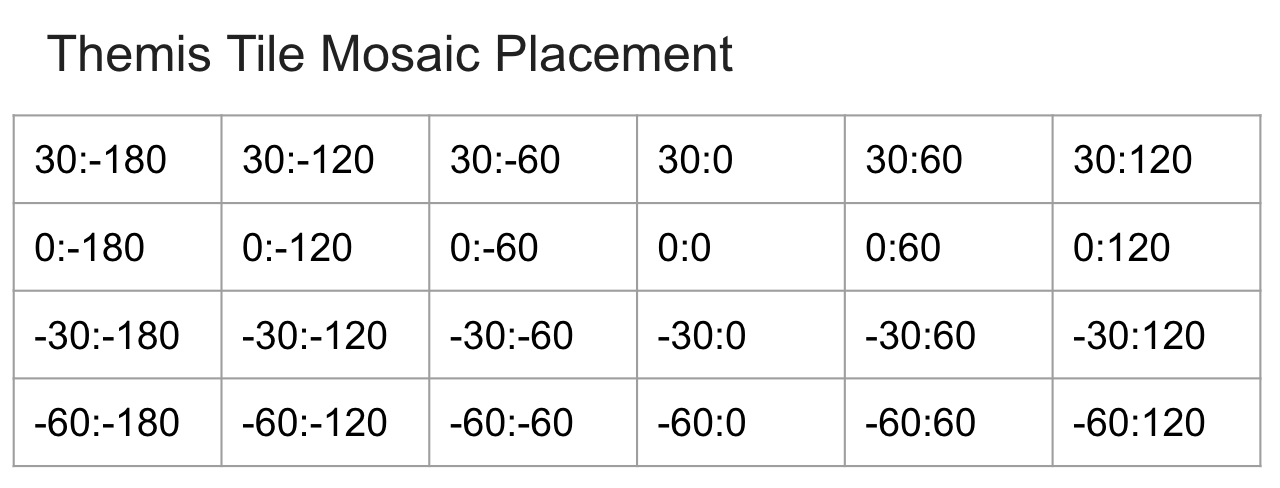
We want to stack this as a grid

| | | | | | |
|-|-|-|-|-|-|
|1|2|3|4|5|6|
|7|8|9|10|11|12|
|13|14|15|16|17|18|
|19|20|21|22|23|24|

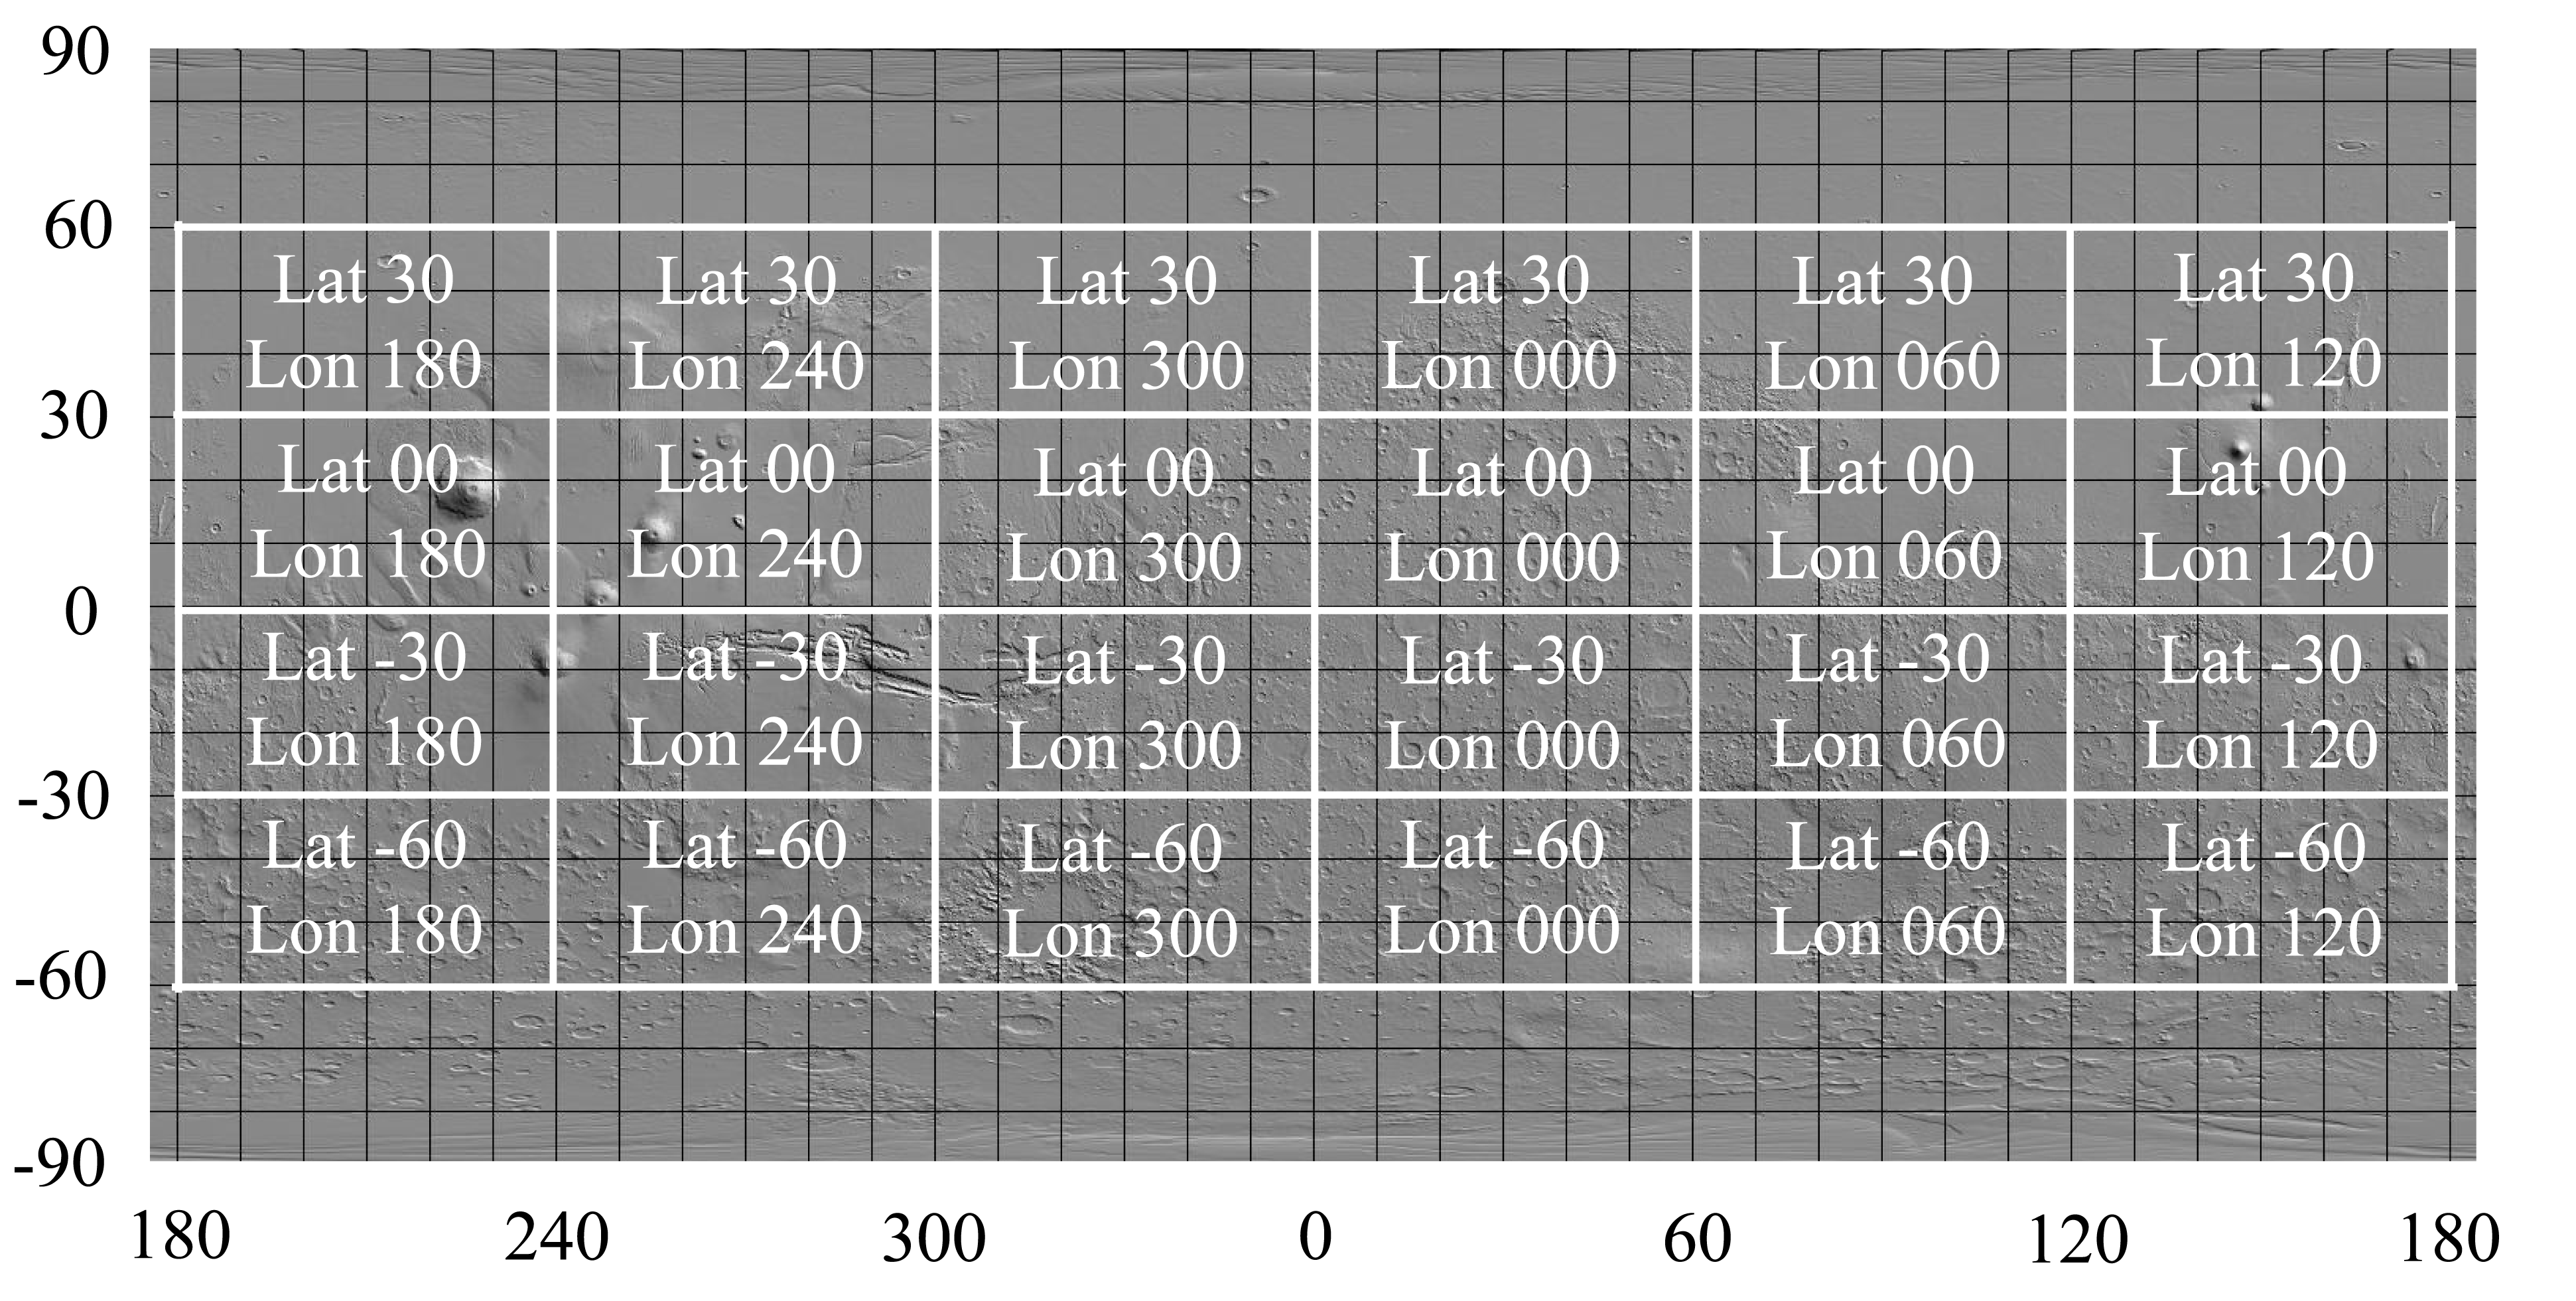


# Test for 1 file

In [4]:
# Let's get the file for 2 grids 
# Grid 1 file 
f1 = 'themis_ti_0lat_0lon.npy'
arr1 = np.load(themis_path + '/'+f1)
arr1.shape

(17783, 35565)

In [ ]:
print('hello')

In [ ]:
#arr1[0,35564]

In [ ]:
def average_grid(arr, lat_giv, lon_giv):
    '''Function to average the grid size into 180 rows X 360 columns
    The Themis files size - 17783 rows X 35565 columns
    Each degree = 592.76 grid of pixels 
    As we cannot consider a decimal as index, we use 593 as our grid value
    I/P
    arr - the themis numpy array to be averaged
    grid_size_row - in this case 593
    grid_size_column - in this case 593
    lat_giv = 0 > 0 to 30
    lon_giv = 0 > 0 to 60'''
    
    # grid 
    lat_giv_st, lat_giv_end  = lat_giv, lat_giv +30
    lon_giv_st, lon_giv_end  = lon_giv, lon_giv+60   
 
    row_cnt = 0
    col_cnt = 0
    
    (lat_end, lon_end) = arr.shape
    deg_res = 593
    average_array = np.empty((180,360)) # 180 rows and 360 columns
    average_array[:] = np.nan
    
    for row in range(0, lat_end, deg_res): # lat loop
        col_cnt = 0 # reset cols
        for col in range(0, lon_end, deg_res): #lon loop
            
            new_lat = np.abs(row_cnt - 90)-1
            new_lon = col_cnt + 180
            #print(new_lat, new_lon)
            average_array[new_lat,new_lon] = arr[row:row+593, col:col+593].mean()
            
            col_cnt+=1
        row_cnt+=1
    return average_array
    

In [22]:
average_array = average_grid(arr1, 0, 0)

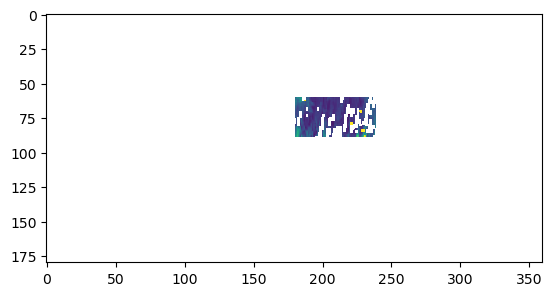

In [27]:
plt.imshow(average_array, vmin=0, vmax=800)

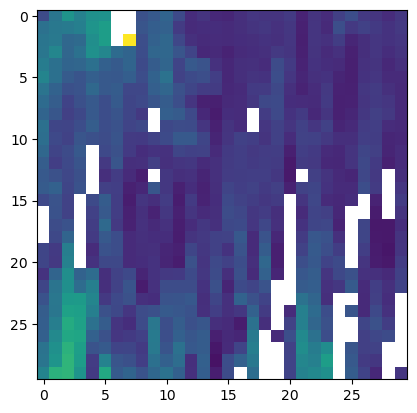

In [28]:
# grid1
plt.imshow(average_array[60:90, 180:210], vmin=0, vmax=800)

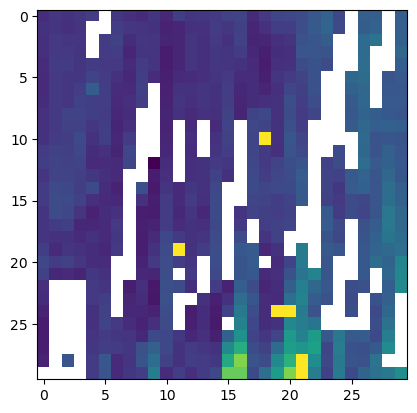

In [29]:
plt.imshow(average_array[60:90, 210:240], vmin=0, vmax=800)

In [31]:
# Save grid 1 
p_save = '/scratch/pk97/krc/krc_codes/Data/Themis_npy/'
f_save = 'Themis_npy_N30_S0_E60_W0.npy'
np.save(p_save+f_save, average_array)


# Grid 2
lat  0:30  
lon -30:0

In [ ]:
# Let's get the file for 2 grids 
# Grid 1 file 
#f1 = 'themis_ti_0lat_-60lon.npy' #grid3 and grid2
f1 = 'themis_ti_0lat_0lon.npy' # grid1 and grid 4
arr1 = np.load(themis_path + '/'+f1)
arr1.shape

In [15]:
def average_grid2(arr, lat_giv, lon_giv):
    '''Function to average the grid size into 180 rows X 360 columns
    The Themis files size - 17783 rows X 35565 columns
    Each degree = 592.76 grid of pixels 
    As we cannot consider a decimal as index, we use 593 as our grid value
    I/P
    arr - the themis numpy array to be averaged
    grid_size_row - in this case 593
    grid_size_column - in this case 593
    lat_giv = 0 > 0 to 30
    lon_giv = 0 > 0 to -60'''
    
    # grid 
    lat_giv_st, lat_giv_end  = lat_giv, lat_giv +30
    lon_giv_st, lon_giv_end  = lon_giv, lon_giv+60   
 
    row_cnt = 0+lat_giv
    col_cnt = 0+lon_giv
    
    (lat_end, lon_end) = arr.shape
    deg_res = 593
    average_array = np.empty((180,360)) # 180 rows and 360 columns
    average_array[:] = np.nan
    
    for row in range(0, lat_end, deg_res): # lat loop
        col_cnt = 0+lon_giv # reset cols
        for col in range(0, lon_end, deg_res): #lon loop
            
            new_lat = np.abs(row_cnt - 90)-1
            new_lon = col_cnt + 180
            print(new_lat, new_lon)
            average_array[new_lat,new_lon] = arr[row:row+593, col:col+593].mean()
            
            col_cnt+=1
        row_cnt+=1
    return average_array
    

In [16]:
average_array = average_grid2(arr1, 0, -60)

89 120
89 121
89 122
89 123
89 124
89 125
89 126
89 127
89 128
89 129
89 130
89 131
89 132
89 133
89 134
89 135
89 136
89 137
89 138
89 139
89 140
89 141
89 142
89 143
89 144
89 145
89 146
89 147
89 148
89 149
89 150
89 151
89 152
89 153
89 154
89 155
89 156
89 157
89 158
89 159
89 160
89 161
89 162
89 163
89 164
89 165
89 166
89 167
89 168
89 169
89 170
89 171
89 172
89 173
89 174
89 175
89 176
89 177
89 178
89 179
88 120
88 121
88 122
88 123
88 124
88 125
88 126
88 127
88 128
88 129
88 130
88 131
88 132
88 133
88 134
88 135
88 136
88 137
88 138
88 139
88 140
88 141
88 142
88 143
88 144
88 145
88 146
88 147
88 148
88 149
88 150
88 151
88 152
88 153
88 154
88 155
88 156
88 157
88 158
88 159
88 160
88 161
88 162
88 163
88 164
88 165
88 166
88 167
88 168
88 169
88 170
88 171
88 172
88 173
88 174
88 175
88 176
88 177
88 178
88 179
87 120
87 121
87 122
87 123
87 124
87 125
87 126
87 127
87 128
87 129
87 130
87 131
87 132
87 133
87 134
87 135
87 136
87 137
87 138
87 139
87 140
87 141
87 142

65 159
65 160
65 161
65 162
65 163
65 164
65 165
65 166
65 167
65 168
65 169
65 170
65 171
65 172
65 173
65 174
65 175
65 176
65 177
65 178
65 179
64 120
64 121
64 122
64 123
64 124
64 125
64 126
64 127
64 128
64 129
64 130
64 131
64 132
64 133
64 134
64 135
64 136
64 137
64 138
64 139
64 140
64 141
64 142
64 143
64 144
64 145
64 146
64 147
64 148
64 149
64 150
64 151
64 152
64 153
64 154
64 155
64 156
64 157
64 158
64 159
64 160
64 161
64 162
64 163
64 164
64 165
64 166
64 167
64 168
64 169
64 170
64 171
64 172
64 173
64 174
64 175
64 176
64 177
64 178
64 179
63 120
63 121
63 122
63 123
63 124
63 125
63 126
63 127
63 128
63 129
63 130
63 131
63 132
63 133
63 134
63 135
63 136
63 137
63 138
63 139
63 140
63 141
63 142
63 143
63 144
63 145
63 146
63 147
63 148
63 149
63 150
63 151
63 152
63 153
63 154
63 155
63 156
63 157
63 158
63 159
63 160
63 161
63 162
63 163
63 164
63 165
63 166
63 167
63 168
63 169
63 170
63 171
63 172
63 173
63 174
63 175
63 176
63 177
63 178
63 179
62 120
62 121

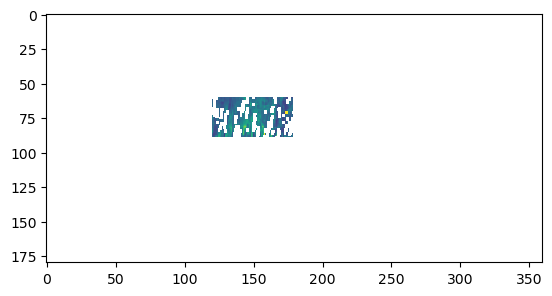

In [17]:
plt.imshow(average_array, vmin=0, vmax=800)

In [18]:
# Save grid 2
p_save = '/scratch/pk97/krc/krc_codes/Data/Themis_npy/'
f_save = 'Themis_npy_N30_S0_W60_E0.npy'
np.save(p_save+f_save, average_array)